## Task 2: Abrupt4xCO2 TOA Changes

### Preprocessing Data

In [2]:
#imports
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import gcsfs
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


In [4]:
gcs = gcsfs.GCSFileSystem(token='anon')

In [5]:
def load_zarr_dset(df):
  # get the path to a specific zarr store (the first one from the dataframe above)
  zstore = df.zstore.values[-1]

  # create a mutable-mapping-style interface to the store
  mapper = gcs.get_mapper(zstore)

  # open it using xarray and zarr
  ds = xr.open_zarr(mapper, consolidated=True)
  return ds

In [6]:
#time index to assign abrupt4xCO2 model times to
new_time_index_abrupt =pd.date_range('1850-01-01', '1999-12-31', freq='ME')
new_time_index_abrupt 

DatetimeIndex(['1850-01-31', '1850-02-28', '1850-03-31', '1850-04-30',
               '1850-05-31', '1850-06-30', '1850-07-31', '1850-08-31',
               '1850-09-30', '1850-10-31',
               ...
               '1999-03-31', '1999-04-30', '1999-05-31', '1999-06-30',
               '1999-07-31', '1999-08-31', '1999-09-30', '1999-10-31',
               '1999-11-30', '1999-12-31'],
              dtype='datetime64[ns]', length=1800, freq='ME')

In [22]:
#regrid to common 1x1 grid
new_lats=np.arange(-87,88)
new_lons=np.arange(1,359)

In [7]:
#query all models for toa radiation variables for abrupt-4xCO2
#rlut
df_abrupt4xCO2_toa_rlut = df.query(  "activity_id=='CMIP'         & table_id == 'Amon' & variable_id == 'rlut' & experiment_id=='abrupt-4xCO2'")
#rsut
df_abrupt4xCO2_toa_rsut = df.query(  "activity_id=='CMIP'         & table_id == 'Amon' & variable_id == 'rsut' & experiment_id=='abrupt-4xCO2'")
#rsdt
df_abrupt4xCO2_toa_rsdt = df.query(  "activity_id=='CMIP'         & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id=='abrupt-4xCO2'")
#models
models_toa_abrupt4xCO2_rlut  = set(df_abrupt4xCO2_toa_rlut.source_id)
models_toa_abrupt4xCO2_rsut  = set(df_abrupt4xCO2_toa_rsut.source_id)
models_toa_abrupt4xCO2_rsdt  = set(df_abrupt4xCO2_toa_rsdt.source_id)

#intersection of all of the models that have all radiation types
source_set_abrupt4xCO2 = set.intersection(models_toa_abrupt4xCO2_rlut, models_toa_abrupt4xCO2_rsut, models_toa_abrupt4xCO2_rsdt)
source_list_abrupt4xCO2 = list(source_set_abrupt4xCO2)
print(len(source_set_abrupt4xCO2))

50


In [8]:
#query all models for toa radiation variables for abrupt-4xCO2 w/ r1i1p1f1
#rlut
df_abrupt4xCO2_toa_rlut = df.query(  "activity_id=='CMIP' & member_id == 'r1i1p1f1' & table_id == 'Amon' & variable_id == 'rlut' & experiment_id=='abrupt-4xCO2'")
#rsut
df_abrupt4xCO2_toa_rsut = df.query(  "activity_id=='CMIP' & member_id == 'r1i1p1f1' & table_id == 'Amon' & variable_id == 'rsut' & experiment_id=='abrupt-4xCO2'")
#rsdt
df_abrupt4xCO2_toa_rsdt = df.query(  "activity_id=='CMIP' & member_id == 'r1i1p1f1' & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id=='abrupt-4xCO2'")
#models
models_toa_abrupt4xCO2_rlut  = set(df_abrupt4xCO2_toa_rlut.source_id)
models_toa_abrupt4xCO2_rsut  = set(df_abrupt4xCO2_toa_rsut.source_id)
models_toa_abrupt4xCO2_rsdt  = set(df_abrupt4xCO2_toa_rsdt.source_id)

#intersection of all of the models that have all radiation types
source_set_abrupt4xCO2_2 = set.intersection(models_toa_abrupt4xCO2_rlut, models_toa_abrupt4xCO2_rsut, models_toa_abrupt4xCO2_rsdt)
source_list_abrupt4xCO2_2 = list(source_set_abrupt4xCO2_2)
print(len(source_list_abrupt4xCO2_2))

42


In [49]:
#remove models
model_list = ['GISS-E2-1-H',
              'INM-CM5-0',
              'TaiESM1',
             'KACE-1-0-G',
              'GISS-E2-2-G',
              'KIOST-ESM',
              'NESM3',
             'CMCC-ESM2',
            'FIO-ESM-2-0',
              'SAM0-UNICON',
             'AWI-CM-1-1-MR',
             'CanESM5',
              'FGOALS-f3-L',
              'GFDL-CM4',
               'NorESM2-MM',
               'CMCC-CM2-SR5',
               'MPI-ESM-1-2-HAM',
               'KACE-1-0-G',
               'EC-Earth3-AerChem',
               'CAMS-CSM1-0',
               'FGOALS-g3',
               'IITM-ESM',
               'CIESM',
               'CAS-ESM2-0',
              'MPI-ESM1-2-LR'
             ]

In [50]:
for source in model_list:
    if source in source_list_abrupt4xCO2_2:
        source_list_abrupt4xCO2_2.remove(source)
print(len(source_list_abrupt4xCO2_2))
print(source_list_abrupt4xCO2_2)

18
['E3SM-1-0', 'MIROC6', 'GISS-E2-1-G', 'GFDL-ESM4', 'INM-CM4-8', 'ACCESS-CM2', 'BCC-CSM2-MR', 'BCC-ESM1', 'CESM2-FV2', 'ACCESS-ESM1-5', 'CESM2-WACCM-FV2', 'NorCPM1', 'EC-Earth3-Veg', 'MPI-ESM1-2-HR', 'IPSL-CM6A-LR', 'CESM2-WACCM', 'MRI-ESM2-0', 'CESM2']


### 2.2 Multiple Models

In [11]:
gcm_list = ['CESM2-WACCM', 'BCC-ESM1', 'CanESM5', 'GISS-E2-1-H', 'BCC-CSM2-MR']

In [25]:
#TOA dtarray of 5 GCM
ds_list_abrupt_gcm = list()
ds_list_piControl_gcm = list()
for source in gcm_list:
    #abrupt4xCO2 data
    df_toa_abrupt4xCO2_rlut = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rlut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f1'")
    df_toa_abrupt4xCO2_rsut = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rsut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f1'")
    df_toa_abrupt4xCO2_rsdt = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f1'")
    df_toa_abrupt4xCO2_rlutcs = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rlutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f1'")
    df_toa_abrupt4xCO2_rsutcs = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rsutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f1'")

    #load abrupt4xCO2 data as dataset
    ds_toa_abrupt4xCO2_rlut = load_zarr_dset(df_toa_abrupt4xCO2_rlut)
    ds_toa_abrupt4xCO2_rsut = load_zarr_dset(df_toa_abrupt4xCO2_rsut)
    ds_toa_abrupt4xCO2_rsdt = load_zarr_dset(df_toa_abrupt4xCO2_rsdt)
    ds_toa_abrupt4xCO2_rlutcs = load_zarr_dset(df_toa_abrupt4xCO2_rlutcs)
    ds_toa_abrupt4xCO2_rsutcs = load_zarr_dset(df_toa_abrupt4xCO2_rsutcs)

    #toa variable for abrupt4xCO2
    ds_abrupt4xCO2_toa = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rsut.rsut - ds_toa_abrupt4xCO2_rlut.rlut
    ds_abrupt_toa_last_ten = ds_abrupt4xCO2_toa.sel(time=slice('1989','1999'))
    ds_abrupt_toa_past_ten = ds_abrupt4xCO2_toa.sel(time=slice('1889','1899'))
    #ds_abrupt4xCO2_toa = ds_abrupt_toa_last_ten - ds_abrupt_toa_past_ten
    
    #toacs and final cre variable
    ds_abrupt4xCO2_toacs = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rlutcs.rlutcs - ds_toa_abrupt4xCO2_rsutcs.rsutcs
    ds_abrupt_toacs_last_ten = ds_abrupt4xCO2_toacs.sel(time=slice('1989','1999'))
    ds_abrupt_toacs_past_ten = ds_abrupt4xCO2_toacs.sel(time=slice('1889','1899'))
    #ds_abrupt4xCO2_toacs = ds_abrupt_toacs_last_ten - ds_abrupt_toacs_past_ten
    ds_abrupt4xCO2_cre = ds_abrupt4xCO2_toa - ds_abrupt4xCO2_toacs

    #combine toa and cre data-arrays
    ds_toa_cre_merged = xr.Dataset({'toa':ds_abrupt4xCO2_toa,'cre':ds_abrupt4xCO2_cre})
    #difference among toa
    dtoa = ds_abrupt4xCO2_toa.sel(time=slice('1989','1999')).mean('time') - ds_abrupt4xCO2_toa.sel(time=slice('1889','1899')).mean('time')
    #difference among cre
    dcre = ds_abrupt4xCO2_cre.sel(time=slice('1989','1999')).mean('time')-ds_abrupt4xCO2_cre.sel(time=slice('1889','1899')).mean('time')
    #interp
    dtoa = dtoa.interp(lat=new_lats,lon=new_lons)
    dcre = dcre.interp(lat=new_lats,lon=new_lons)
    #combined difference (toa and cre) ds
    dtoa_cre = xr.Dataset({'toa':dtoa, 'cre':dcre})
    dtoa_cre = dtoa_cre.assign_coords(model=source)
    ds_list_abrupt_gcm.append(dtoa_cre)
ds_gcm_abrupt_models = xr.concat(ds_list_abrupt_gcm, dim = 'model', coords = 'minimal', compat = 'override')
ds_gcm_abrupt_models

<xarray.Dataset>
Dimensions:  (lat: 175, lon: 358, model: 5)
Coordinates:
  * lat      (lat) int32 -87 -86 -85 -84 -83 -82 -81 ... 81 82 83 84 85 86 87
  * lon      (lon) int32 1 2 3 4 5 6 7 8 9 ... 351 352 353 354 355 356 357 358
  * model    (model) <U11 'CESM2-WACCM' 'BCC-ESM1' ... 'BCC-CSM2-MR'
Data variables:
    toa      (model, lat, lon) float32 dask.array<chunksize=(1, 175, 358), meta=np.ndarray>
    cre      (model, lat, lon) float32 dask.array<chunksize=(1, 175, 358), meta=np.ndarray>

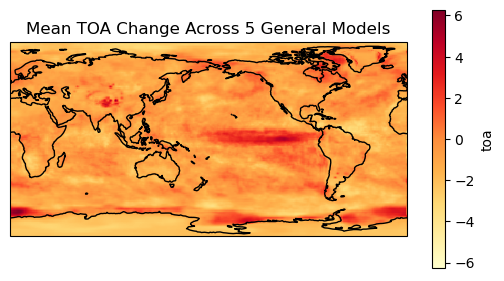

In [26]:
#TOA plot
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = 180))
ax.coastlines()
ds_gcm_models_mean = ds_gcm_abrupt_models.toa.mean(dim='model') #took mean across models to eliminate one dimension and mash all model data tg -> 2D now
ds_gcm_models_mean.plot(ax=ax, cmap = "YlOrRd", transform = ccrs.PlateCarree(), cbar_kwargs = {"shrink": 0.7})
plt.title('Mean TOA Change Across 5 General Models')
plt.show()

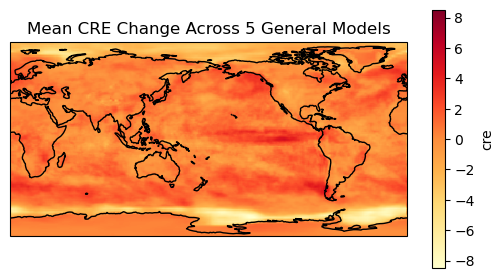

In [27]:
#CRE plot
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = 180))
ax.coastlines()
ds_gcm_models_mean = ds_gcm_abrupt_models.cre.mean(dim='model') #took mean across models to eliminate one dimension and mash all model data tg -> 2D now
ds_gcm_models_mean.plot(ax=ax, cmap = "YlOrRd", transform = ccrs.PlateCarree(), cbar_kwargs = {"shrink": 0.7})
plt.title('Mean CRE Change Across 5 General Models')
plt.show()

### Adding in 4 More Models

In [39]:
ds_abrupt_list_4_models = list()
#abrupt data
#abrupt4xCO2 data
df_toa_abrupt4xCO2_rlut = df.query("activity_id =='CMIP' & source_id ==  'CNRM-CM6-1-HR' & table_id == 'Amon' & variable_id == 'rlut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsut = df.query("activity_id =='CMIP' & source_id ==  'CNRM-CM6-1-HR' & table_id == 'Amon' & variable_id == 'rsut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsdt = df.query("activity_id =='CMIP' & source_id ==  'CNRM-CM6-1-HR' & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rlutcs = df.query("activity_id =='CMIP' & source_id ==  'CNRM-CM6-1-HR' & table_id == 'Amon' & variable_id == 'rlutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsutcs = df.query("activity_id =='CMIP' & source_id ==  'CNRM-CM6-1-HR' & table_id == 'Amon' & variable_id == 'rsutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_tas_abrupt4xCO2      = df.query("activity_id =='CMIP' & source_id == 'CNRM-CM6-1-HR'  & table_id == 'Amon' & variable_id == 'tas'  & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
#load abrupt4xCO2 data as dataset
ds_toa_abrupt4xCO2_rlut = load_zarr_dset(df_toa_abrupt4xCO2_rlut)
ds_toa_abrupt4xCO2_rsut = load_zarr_dset(df_toa_abrupt4xCO2_rsut)
ds_toa_abrupt4xCO2_rsdt = load_zarr_dset(df_toa_abrupt4xCO2_rsdt)
ds_toa_abrupt4xCO2_rlutcs = load_zarr_dset(df_toa_abrupt4xCO2_rlutcs)
ds_toa_abrupt4xCO2_rsutcs = load_zarr_dset(df_toa_abrupt4xCO2_rsutcs)
ds_tas_abrupt4xCO2 = load_zarr_dset(df_tas_abrupt4xCO2)
#toa variable for abrupt4xCO2
ds_abrupt4xCO2_toa = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rsut.rsut - ds_toa_abrupt4xCO2_rlut.rlut
ds_abrupt_toa_last_ten = ds_abrupt4xCO2_toa.sel(time=slice('1989','1999'))
ds_abrupt_toa_past_ten = ds_abrupt4xCO2_toa.sel(time=slice('1889','1899'))
#ds_abrupt4xCO2_toa = ds_abrupt_toa_last_ten - ds_abrupt_toa_past_ten
    
#toacs and final cre variable
ds_abrupt4xCO2_toacs = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rlutcs.rlutcs - ds_toa_abrupt4xCO2_rsutcs.rsutcs
ds_abrupt4xCO2_cre = ds_abrupt4xCO2_toa - ds_abrupt4xCO2_toacs

#combine toa and cre data-arrays
ds_toa_cre_merged = xr.Dataset({'toa':ds_abrupt4xCO2_toa,'cre':ds_abrupt4xCO2_cre})
#difference among toa
dtoa = ds_abrupt4xCO2_toa.sel(time=slice('1989','1999')).mean('time') - ds_abrupt4xCO2_toa.sel(time=slice('1889','1899')).mean('time')
#difference among cre
dcre = ds_abrupt4xCO2_cre.sel(time=slice('1989','1999')).mean('time')-ds_abrupt4xCO2_cre.sel(time=slice('1889','1899')).mean('time')
#interp
dtoa = dtoa.interp(lat=new_lats,lon=new_lons)
dcre = dcre.interp(lat=new_lats,lon=new_lons)
#combined difference (toa and cre) ds
dtoa_cre = xr.Dataset({'toa':dtoa, 'cre':dcre})
dtoa_cre = dtoa_cre.assign_coords(model=ds_toa_abrupt4xCO2_rlut.source_id)
print(dtoa_cre)
ds_abrupt_list_4_models.append(dtoa_cre)

<xarray.Dataset>
Dimensions:  (lat: 175, lon: 358)
Coordinates:
  * lat      (lat) int32 -87 -86 -85 -84 -83 -82 -81 ... 81 82 83 84 85 86 87
  * lon      (lon) int32 1 2 3 4 5 6 7 8 9 ... 351 352 353 354 355 356 357 358
    model    <U13 'CNRM-CM6-1-HR'
Data variables:
    toa      (lat, lon) float32 dask.array<chunksize=(175, 358), meta=np.ndarray>
    cre      (lat, lon) float32 dask.array<chunksize=(175, 358), meta=np.ndarray>


In [40]:
#abrupt4xCO2 data
df_toa_abrupt4xCO2_rlut = df.query("activity_id =='CMIP' & source_id ==  'MIROC-ES2L' & table_id == 'Amon' & variable_id == 'rlut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsut = df.query("activity_id =='CMIP' & source_id ==  'MIROC-ES2L' & table_id == 'Amon' & variable_id == 'rsut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsdt = df.query("activity_id =='CMIP' & source_id ==  'MIROC-ES2L' & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rlutcs = df.query("activity_id =='CMIP' & source_id ==  'MIROC-ES2L' & table_id == 'Amon' & variable_id == 'rlutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsutcs = df.query("activity_id =='CMIP' & source_id ==  'MIROC-ES2L' & table_id == 'Amon' & variable_id == 'rsutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_tas_abrupt4xCO2      = df.query("activity_id =='CMIP' & source_id == 'MIROC-ES2L'  & table_id == 'Amon' & variable_id == 'tas'  & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
#load abrupt4xCO2 data as dataset
ds_toa_abrupt4xCO2_rlut = load_zarr_dset(df_toa_abrupt4xCO2_rlut)
ds_toa_abrupt4xCO2_rsut = load_zarr_dset(df_toa_abrupt4xCO2_rsut)
ds_toa_abrupt4xCO2_rsdt = load_zarr_dset(df_toa_abrupt4xCO2_rsdt)
ds_toa_abrupt4xCO2_rlutcs = load_zarr_dset(df_toa_abrupt4xCO2_rlutcs)
ds_toa_abrupt4xCO2_rsutcs = load_zarr_dset(df_toa_abrupt4xCO2_rsutcs)
ds_tas_abrupt4xCO2 = load_zarr_dset(df_tas_abrupt4xCO2)
#toa variable for abrupt4xCO2
ds_abrupt4xCO2_toa = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rsut.rsut - ds_toa_abrupt4xCO2_rlut.rlut
ds_abrupt_toa_last_ten = ds_abrupt4xCO2_toa.sel(time=slice('1989','1999'))
ds_abrupt_toa_past_ten = ds_abrupt4xCO2_toa.sel(time=slice('1889','1899'))
#ds_abrupt4xCO2_toa = ds_abrupt_toa_last_ten - ds_abrupt_toa_past_ten
    
#toacs and final cre variable
ds_abrupt4xCO2_toacs = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rlutcs.rlutcs - ds_toa_abrupt4xCO2_rsutcs.rsutcs
ds_abrupt4xCO2_cre = ds_abrupt4xCO2_toa - ds_abrupt4xCO2_toacs

#combine toa and cre data-arrays
ds_toa_cre_merged = xr.Dataset({'toa':ds_abrupt4xCO2_toa,'cre':ds_abrupt4xCO2_cre})
#difference among toa
dtoa = ds_abrupt4xCO2_toa.sel(time=slice('1989','1999')).mean('time') - ds_abrupt4xCO2_toa.sel(time=slice('1889','1899')).mean('time')
#difference among cre
dcre = ds_abrupt4xCO2_cre.sel(time=slice('1989','1999')).mean('time')-ds_abrupt4xCO2_cre.sel(time=slice('1889','1899')).mean('time')
#interp
dtoa = dtoa.interp(lat=new_lats,lon=new_lons)
dcre = dcre.interp(lat=new_lats,lon=new_lons)
#combined difference (toa and cre) ds
dtoa_cre = xr.Dataset({'toa':dtoa, 'cre':dcre})
dtoa_cre = dtoa_cre.assign_coords(model=ds_toa_abrupt4xCO2_rlut.source_id)
print(dtoa_cre)
ds_abrupt_list_4_models.append(dtoa_cre)

<xarray.Dataset>
Dimensions:  (lat: 175, lon: 358)
Coordinates:
  * lat      (lat) int32 -87 -86 -85 -84 -83 -82 -81 ... 81 82 83 84 85 86 87
  * lon      (lon) int32 1 2 3 4 5 6 7 8 9 ... 351 352 353 354 355 356 357 358
    model    <U10 'MIROC-ES2L'
Data variables:
    toa      (lat, lon) float32 dask.array<chunksize=(175, 358), meta=np.ndarray>
    cre      (lat, lon) float32 dask.array<chunksize=(175, 358), meta=np.ndarray>


In [41]:
#abrupt4xCO2 data
df_toa_abrupt4xCO2_rlut = df.query("activity_id =='CMIP' & source_id ==  'CNRM-ESM2-1' & table_id == 'Amon' & variable_id == 'rlut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsut = df.query("activity_id =='CMIP' & source_id ==  'CNRM-ESM2-1' & table_id == 'Amon' & variable_id == 'rsut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsdt = df.query("activity_id =='CMIP' & source_id ==  'CNRM-ESM2-1' & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rlutcs = df.query("activity_id =='CMIP' & source_id ==  'CNRM-ESM2-1' & table_id == 'Amon' & variable_id == 'rlutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsutcs = df.query("activity_id =='CMIP' & source_id ==  'CNRM-ESM2-1' & table_id == 'Amon' & variable_id == 'rsutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_tas_abrupt4xCO2      = df.query("activity_id =='CMIP' & source_id == 'CNRM-ESM2-1'  & table_id == 'Amon' & variable_id == 'tas'  & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
#load abrupt4xCO2 data as dataset
ds_toa_abrupt4xCO2_rlut = load_zarr_dset(df_toa_abrupt4xCO2_rlut)
ds_toa_abrupt4xCO2_rsut = load_zarr_dset(df_toa_abrupt4xCO2_rsut)
ds_toa_abrupt4xCO2_rsdt = load_zarr_dset(df_toa_abrupt4xCO2_rsdt)
ds_toa_abrupt4xCO2_rlutcs = load_zarr_dset(df_toa_abrupt4xCO2_rlutcs)
ds_toa_abrupt4xCO2_rsutcs = load_zarr_dset(df_toa_abrupt4xCO2_rsutcs)
ds_tas_abrupt4xCO2 = load_zarr_dset(df_tas_abrupt4xCO2)
#toa variable for abrupt4xCO2
ds_abrupt4xCO2_toa = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rsut.rsut - ds_toa_abrupt4xCO2_rlut.rlut
ds_abrupt_toa_last_ten = ds_abrupt4xCO2_toa.sel(time=slice('1989','1999'))
ds_abrupt_toa_past_ten = ds_abrupt4xCO2_toa.sel(time=slice('1889','1899'))
#ds_abrupt4xCO2_toa = ds_abrupt_toa_last_ten - ds_abrupt_toa_past_ten
    
#toacs and final cre variable
ds_abrupt4xCO2_toacs = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rlutcs.rlutcs - ds_toa_abrupt4xCO2_rsutcs.rsutcs
ds_abrupt4xCO2_cre = ds_abrupt4xCO2_toa - ds_abrupt4xCO2_toacs

#combine toa and cre data-arrays
ds_toa_cre_merged = xr.Dataset({'toa':ds_abrupt4xCO2_toa,'cre':ds_abrupt4xCO2_cre})
#difference among toa
dtoa = ds_abrupt4xCO2_toa.sel(time=slice('1989','1999')).mean('time') - ds_abrupt4xCO2_toa.sel(time=slice('1889','1899')).mean('time')
#difference among cre
dcre = ds_abrupt4xCO2_cre.sel(time=slice('1989','1999')).mean('time')-ds_abrupt4xCO2_cre.sel(time=slice('1889','1899')).mean('time')
#interp
dtoa = dtoa.interp(lat=new_lats,lon=new_lons)
dcre = dcre.interp(lat=new_lats,lon=new_lons)
#combined difference (toa and cre) ds
dtoa_cre = xr.Dataset({'toa':dtoa, 'cre':dcre})
dtoa_cre = dtoa_cre.assign_coords(model=ds_toa_abrupt4xCO2_rlut.source_id)
print(dtoa_cre)
ds_abrupt_list_4_models.append(dtoa_cre)

<xarray.Dataset>
Dimensions:  (lat: 175, lon: 358)
Coordinates:
  * lat      (lat) int32 -87 -86 -85 -84 -83 -82 -81 ... 81 82 83 84 85 86 87
  * lon      (lon) int32 1 2 3 4 5 6 7 8 9 ... 351 352 353 354 355 356 357 358
    model    <U11 'CNRM-ESM2-1'
Data variables:
    toa      (lat, lon) float32 dask.array<chunksize=(175, 358), meta=np.ndarray>
    cre      (lat, lon) float32 dask.array<chunksize=(175, 358), meta=np.ndarray>


In [42]:
#abrupt4xCO2 data
df_toa_abrupt4xCO2_rlut = df.query("activity_id =='CMIP' & source_id ==  'CNRM-CM6-1' & table_id == 'Amon' & variable_id == 'rlut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsut = df.query("activity_id =='CMIP' & source_id ==  'CNRM-CM6-1' & table_id == 'Amon' & variable_id == 'rsut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsdt = df.query("activity_id =='CMIP' & source_id ==  'CNRM-CM6-1' & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rlutcs = df.query("activity_id =='CMIP' & source_id ==  'CNRM-CM6-1' & table_id == 'Amon' & variable_id == 'rlutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsutcs = df.query("activity_id =='CMIP' & source_id ==  'CNRM-CM6-1' & table_id == 'Amon' & variable_id == 'rsutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_tas_abrupt4xCO2      = df.query("activity_id =='CMIP' & source_id == 'CNRM-CM6-1'  & table_id == 'Amon' & variable_id == 'tas'  & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
#load abrupt4xCO2 data as dataset
ds_toa_abrupt4xCO2_rlut = load_zarr_dset(df_toa_abrupt4xCO2_rlut)
ds_toa_abrupt4xCO2_rsut = load_zarr_dset(df_toa_abrupt4xCO2_rsut)
ds_toa_abrupt4xCO2_rsdt = load_zarr_dset(df_toa_abrupt4xCO2_rsdt)
ds_toa_abrupt4xCO2_rlutcs = load_zarr_dset(df_toa_abrupt4xCO2_rlutcs)
ds_toa_abrupt4xCO2_rsutcs = load_zarr_dset(df_toa_abrupt4xCO2_rsutcs)
ds_tas_abrupt4xCO2 = load_zarr_dset(df_tas_abrupt4xCO2)
#toa variable for abrupt4xCO2
ds_abrupt4xCO2_toa = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rsut.rsut - ds_toa_abrupt4xCO2_rlut.rlut
ds_abrupt_toa_last_ten = ds_abrupt4xCO2_toa.sel(time=slice('1989','1999'))
ds_abrupt_toa_past_ten = ds_abrupt4xCO2_toa.sel(time=slice('1889','1899'))
#ds_abrupt4xCO2_toa = ds_abrupt_toa_last_ten - ds_abrupt_toa_past_ten
    
#toacs and final cre variable
ds_abrupt4xCO2_toacs = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rlutcs.rlutcs - ds_toa_abrupt4xCO2_rsutcs.rsutcs
ds_abrupt4xCO2_cre = ds_abrupt4xCO2_toa - ds_abrupt4xCO2_toacs

#combine toa and cre data-arrays
ds_toa_cre_merged = xr.Dataset({'toa':ds_abrupt4xCO2_toa,'cre':ds_abrupt4xCO2_cre})
#difference among toa
dtoa = ds_abrupt4xCO2_toa.sel(time=slice('1989','1999')).mean('time') - ds_abrupt4xCO2_toa.sel(time=slice('1889','1899')).mean('time')
#difference among cre
dcre = ds_abrupt4xCO2_cre.sel(time=slice('1989','1999')).mean('time')-ds_abrupt4xCO2_cre.sel(time=slice('1889','1899')).mean('time')
#interp
dtoa = dtoa.interp(lat=new_lats,lon=new_lons)
dcre = dcre.interp(lat=new_lats,lon=new_lons)
#combined difference (toa and cre) ds
dtoa_cre = xr.Dataset({'toa':dtoa, 'cre':dcre})
dtoa_cre = dtoa_cre.assign_coords(model=ds_toa_abrupt4xCO2_rlut.source_id)
print(dtoa_cre)
ds_abrupt_list_4_models.append(dtoa_cre)

<xarray.Dataset>
Dimensions:  (lat: 175, lon: 358)
Coordinates:
  * lat      (lat) int32 -87 -86 -85 -84 -83 -82 -81 ... 81 82 83 84 85 86 87
  * lon      (lon) int32 1 2 3 4 5 6 7 8 9 ... 351 352 353 354 355 356 357 358
    model    <U10 'CNRM-CM6-1'
Data variables:
    toa      (lat, lon) float32 dask.array<chunksize=(175, 358), meta=np.ndarray>
    cre      (lat, lon) float32 dask.array<chunksize=(175, 358), meta=np.ndarray>


In [43]:
ds_abrupt_4_models = xr.concat(ds_abrupt_list_4_models, dim = 'model', coords = 'minimal', compat='override')
ds_abrupt_4_models

<xarray.Dataset>
Dimensions:  (lat: 175, lon: 358, model: 4)
Coordinates:
  * lat      (lat) int32 -87 -86 -85 -84 -83 -82 -81 ... 81 82 83 84 85 86 87
  * lon      (lon) int32 1 2 3 4 5 6 7 8 9 ... 351 352 353 354 355 356 357 358
  * model    (model) <U13 'CNRM-CM6-1-HR' 'MIROC-ES2L' ... 'CNRM-CM6-1'
Data variables:
    toa      (model, lat, lon) float32 dask.array<chunksize=(1, 175, 358), meta=np.ndarray>
    cre      (model, lat, lon) float32 dask.array<chunksize=(1, 175, 358), meta=np.ndarray>

In [61]:
source_list_abrupt4xCO2_2.remove('EC-Earth3-Veg')

In [62]:
#r1i1p1f1 models
ds_list_abrupt = list()
for source in source_list_abrupt4xCO2_2:
    #abrupt4xCO2 data
    df_toa_abrupt4xCO2_rlut = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rlut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f1'")
    df_toa_abrupt4xCO2_rsut = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rsut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f1'")
    df_toa_abrupt4xCO2_rsdt = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f1'")
    df_toa_abrupt4xCO2_rlutcs = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rlutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f1'")
    df_toa_abrupt4xCO2_rsutcs = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rsutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f1'")

    #load abrupt4xCO2 data as dataset
    ds_toa_abrupt4xCO2_rlut = load_zarr_dset(df_toa_abrupt4xCO2_rlut)
    ds_toa_abrupt4xCO2_rsut = load_zarr_dset(df_toa_abrupt4xCO2_rsut)
    ds_toa_abrupt4xCO2_rsdt = load_zarr_dset(df_toa_abrupt4xCO2_rsdt)
    ds_toa_abrupt4xCO2_rlutcs = load_zarr_dset(df_toa_abrupt4xCO2_rlutcs)
    ds_toa_abrupt4xCO2_rsutcs = load_zarr_dset(df_toa_abrupt4xCO2_rsutcs)

    #toa variable for abrupt4xCO2
    ds_abrupt4xCO2_toa = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rsut.rsut - ds_toa_abrupt4xCO2_rlut.rlut
    ds_abrupt_toa_last_ten = ds_abrupt4xCO2_toa.sel(time=slice('1989','1999'))
    ds_abrupt_toa_past_ten = ds_abrupt4xCO2_toa.sel(time=slice('1889','1899'))
    #ds_abrupt4xCO2_toa = ds_abrupt_toa_last_ten - ds_abrupt_toa_past_ten
    
    #toacs and final cre variable
    ds_abrupt4xCO2_toacs = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rlutcs.rlutcs - ds_toa_abrupt4xCO2_rsutcs.rsutcs
    ds_abrupt_toacs_last_ten = ds_abrupt4xCO2_toacs.sel(time=slice('1989','1999'))
    ds_abrupt_toacs_past_ten = ds_abrupt4xCO2_toacs.sel(time=slice('1889','1899'))
    #ds_abrupt4xCO2_toacs = ds_abrupt_toacs_last_ten - ds_abrupt_toacs_past_ten
    ds_abrupt4xCO2_cre = ds_abrupt4xCO2_toa - ds_abrupt4xCO2_toacs

    #combine toa and cre data-arrays
    ds_toa_cre_merged = xr.Dataset({'toa':ds_abrupt4xCO2_toa,'cre':ds_abrupt4xCO2_cre})
    #difference among toa
    dtoa = ds_abrupt4xCO2_toa.sel(time=slice('1989','1999')).mean('time') - ds_abrupt4xCO2_toa.sel(time=slice('1889','1899')).mean('time')
    #difference among cre
    dcre = ds_abrupt4xCO2_cre.sel(time=slice('1989','1999')).mean('time')-ds_abrupt4xCO2_cre.sel(time=slice('1889','1899')).mean('time')
    #interp
    dtoa = dtoa.interp(lat=new_lats,lon=new_lons)
    dcre = dcre.interp(lat=new_lats,lon=new_lons)
    #combined difference (toa and cre) ds
    dtoa_cre = xr.Dataset({'toa':dtoa, 'cre':dcre})
    dtoa_cre = dtoa_cre.assign_coords(model=source)
    ds_list_abrupt.append(dtoa_cre)

C:\Users\panda\miniconda3\envs\temp_var\Lib\site-packages\xarray\coding\times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\panda\miniconda3\envs\temp_var\Lib\site-packages\xarray\core\indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
C:\Users\panda\miniconda3\envs\temp_var\Lib\site-packages\xarray\coding\times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\panda\miniconda3\envs\temp_var\Lib\site-packages\xarray\core\

In [63]:
ds_abrupt_models = xr.concat(ds_list_abrupt, dim = 'model', coords = 'minimal', compat = 'override')
ds_abrupt_models

<xarray.Dataset>
Dimensions:  (lat: 175, lon: 358, model: 17)
Coordinates:
  * lat      (lat) int32 -87 -86 -85 -84 -83 -82 -81 ... 81 82 83 84 85 86 87
  * lon      (lon) int32 1 2 3 4 5 6 7 8 9 ... 351 352 353 354 355 356 357 358
  * model    (model) <U15 'E3SM-1-0' 'MIROC6' ... 'MRI-ESM2-0' 'CESM2'
Data variables:
    toa      (model, lat, lon) float32 dask.array<chunksize=(1, 175, 358), meta=np.ndarray>
    cre      (model, lat, lon) float32 dask.array<chunksize=(1, 175, 358), meta=np.ndarray>

In [64]:
ds_all_abrupt_models = xr.concat([ds_abrupt_models, ds_abrupt_4_models], dim = 'model', coords = 'minimal', compat = 'override')
ds_all_abrupt_models

<xarray.Dataset>
Dimensions:  (lat: 175, lon: 358, model: 21)
Coordinates:
  * lat      (lat) int32 -87 -86 -85 -84 -83 -82 -81 ... 81 82 83 84 85 86 87
  * lon      (lon) int32 1 2 3 4 5 6 7 8 9 ... 351 352 353 354 355 356 357 358
  * model    (model) <U15 'E3SM-1-0' 'MIROC6' ... 'CNRM-ESM2-1' 'CNRM-CM6-1'
Data variables:
    toa      (model, lat, lon) float32 dask.array<chunksize=(1, 175, 358), meta=np.ndarray>
    cre      (model, lat, lon) float32 dask.array<chunksize=(1, 175, 358), meta=np.ndarray>

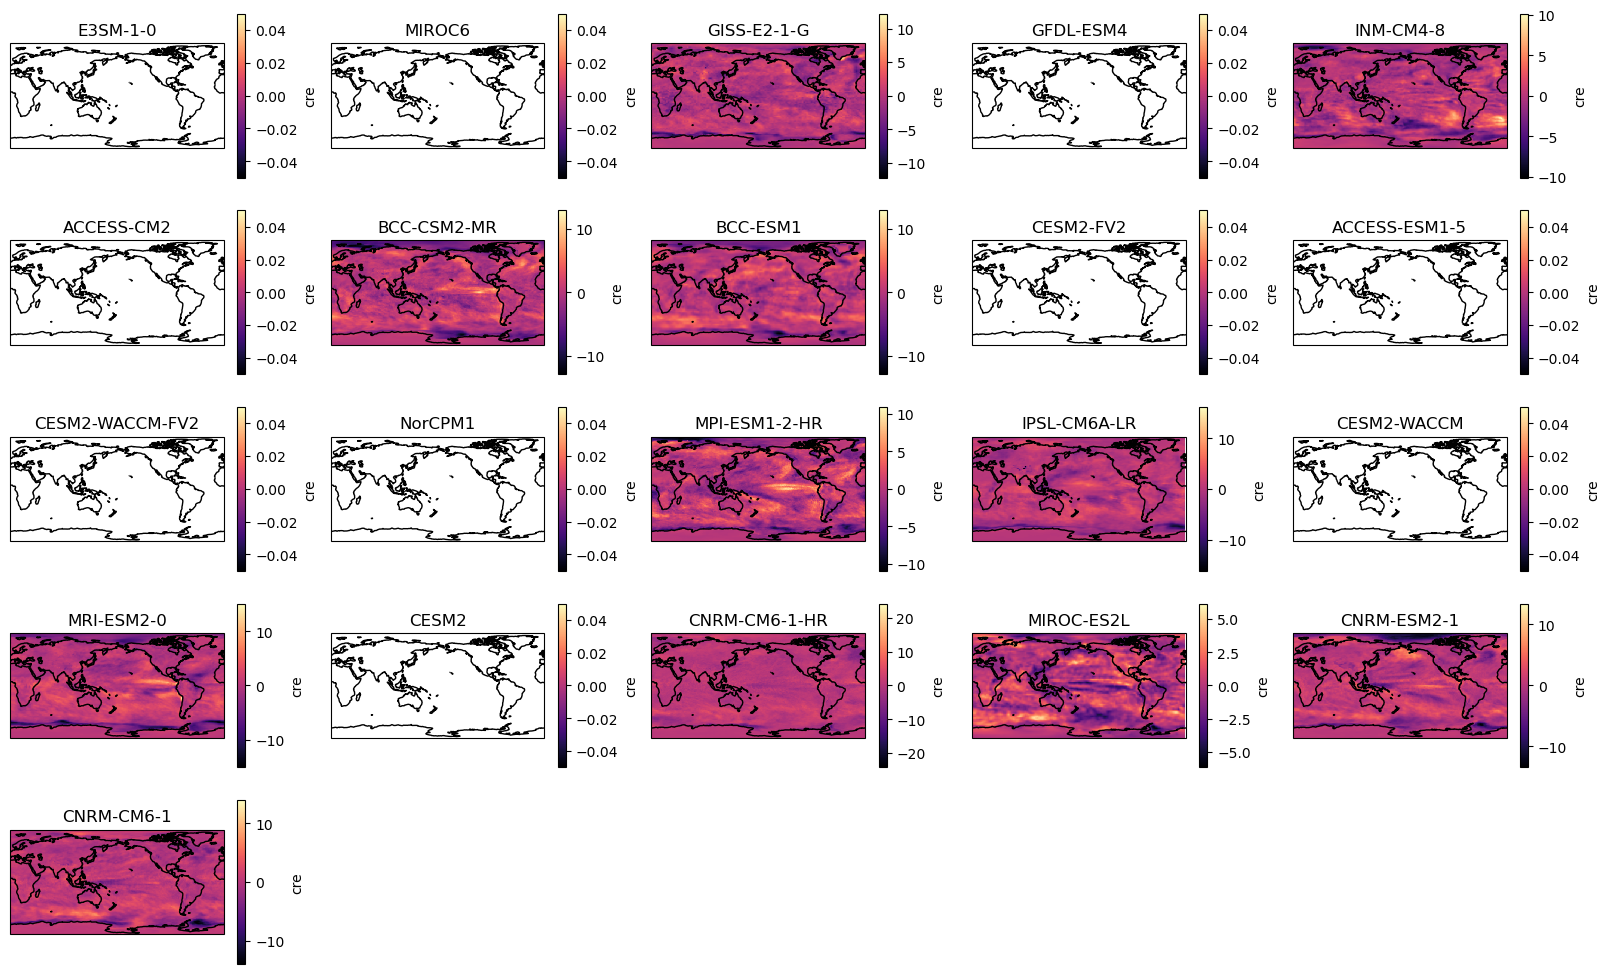

In [65]:
fig = plt.figure(figsize=(20,20))
i = 1
for model in ds_all_abrupt_models.model.values:
    ax = fig.add_subplot(8,5,i, projection=ccrs.PlateCarree(central_longitude=180))
    ds_all_abrupt_models.cre.sel(model=model).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='magma')
    ax.coastlines(color='black', linewidth=1)
    plt.title(model)
    i += 1

In [60]:
ds_all_abrupt_models.model[12]

<xarray.DataArray 'model' ()>
array('EC-Earth3-Veg', dtype='<U15')
Coordinates:
    model    <U15 'EC-Earth3-Veg'

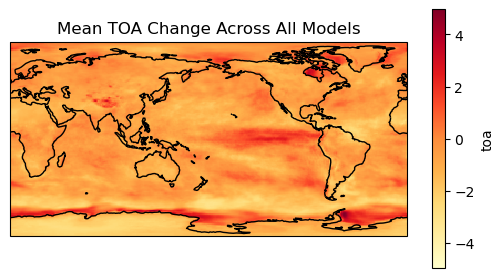

In [66]:
#TOA plot
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = 180))
ax.coastlines()
ds_all_toa_models_mean = ds_all_abrupt_models.toa.mean(dim='model') #took mean across models to eliminate one dimension and mash all model data tg -> 2D now
ds_all_toa_models_mean.plot(ax=ax, cmap = "YlOrRd", transform = ccrs.PlateCarree(), cbar_kwargs = {"shrink": 0.7})
plt.title('Mean TOA Change Across All Models')
plt.show()

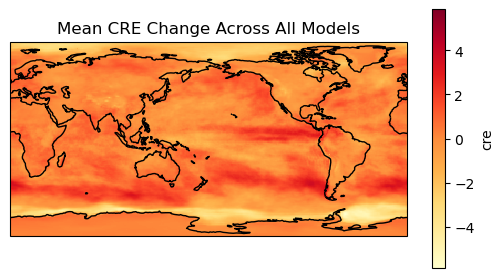

In [67]:
#CRE plot
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = 180))
ax.coastlines()
ds_all_toa_models_mean = ds_all_abrupt_models.cre.mean(dim='model') #took mean across models to eliminate one dimension and mash all model data tg -> 2D now
ds_all_toa_models_mean.plot(ax=ax, cmap = "YlOrRd", transform = ccrs.PlateCarree(), cbar_kwargs = {"shrink": 0.7})
plt.title('Mean CRE Change Across All Models')
plt.show()

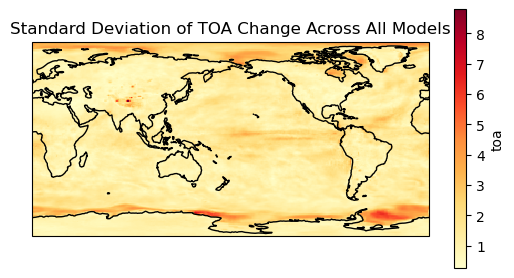

In [68]:
#TOA plot
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = 180))
ax.coastlines()
ds_all_toa_models_std = ds_all_abrupt_models.toa.std(dim='model') #took mean across models to eliminate one dimension and mash all model data tg -> 2D now
ds_all_toa_models_std.plot(ax=ax, cmap = "YlOrRd", transform = ccrs.PlateCarree(), cbar_kwargs = {"shrink": 0.7})
plt.title('Standard Deviation of TOA Change Across All Models')
plt.show()

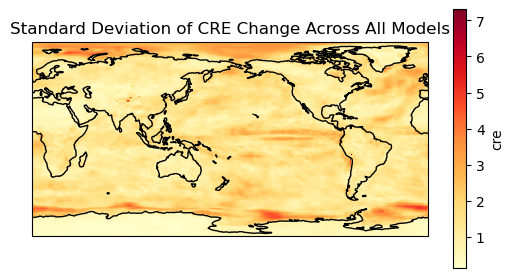

In [69]:
#CRE plot
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = 180))
ax.coastlines()
ds_all_toa_models_std = ds_all_abrupt_models.cre.std(dim='model') #took mean across models to eliminate one dimension and mash all model data tg -> 2D now
ds_all_toa_models_std.plot(ax=ax, cmap = "YlOrRd", transform = ccrs.PlateCarree(), cbar_kwargs = {"shrink": 0.7})
plt.title('Standard Deviation of CRE Change Across All Models')
plt.show()

In [70]:
#saving to netcdf file
ds_all_abrupt_models.to_netcdf("processed_abrupt4xCO2_toa_regional_data.nc", mode = 'w', format = "NETCDF4", engine = 'netcdf4')